In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
200/200 [==============================] - 1s 3ms/step - loss: 493.5325 - accuracy: 0.6902 - val_loss: 74.0800 - val_accuracy: 0.5475
Epoch 2/200
200/200 [==============================] - 0s 2ms/step - loss: 95.6148 - accuracy: 0.6812 - val_loss: 195.8915 - val_accuracy: 0.7975
Epoch 3/200
200/200 [==============================] - 0s 2ms/step - loss: 90.1406 - accuracy: 0.6831 - val_loss: 87.4636 - val_accuracy: 0.6875
Epoch 4/200
200/200 [==============================] - 0s 2ms/step - loss: 64.2975 - accuracy: 0.6811 - val_loss: 51.7735 - val_accuracy: 0.7969
Epoch 5/200
200/200 [==============================] - 0s 2ms/step - loss: 82.3687 - accuracy: 0.6709 - val_loss: 55.7082 - val_accuracy: 0.7937
Epoch 6/200
200/200 [==============================] - 0s 2ms/step - loss: 99.1910 - accuracy: 0.6862 - val_loss: 237.8778 - val_accuracy: 0.7969
Epoch 7/200
200/200 [==============================] - 0s 2ms/step - loss: 67.4884 - accuracy: 0.6794 - val_loss: 41.8676 - val

In [17]:
model.layers[0].get_weights()

[array([[-1.7325975e-01,  4.3386653e-01, -2.6786816e-01, -4.5081139e-02,
         -5.8547217e-01,  4.6739140e-01,  5.2566433e-01,  7.1095578e-02,
         -1.7180678e-01, -1.8209775e-01, -2.2916263e-01],
        [-9.0891409e-01, -1.0724106e+00,  3.8850158e-01,  1.7078614e+00,
          1.8947213e+00,  1.0864704e-01,  6.4263463e-01, -3.0020769e+00,
          1.4642771e+00,  2.4320865e+00, -1.5866855e-01],
        [-3.7021106e-01, -2.7738968e-01, -8.4929168e-02, -6.2504691e-01,
         -8.1778353e-01,  1.6076994e-01,  3.3951449e-01,  7.6709139e-01,
         -7.7543616e-01, -9.9303854e-01, -5.4062521e-01],
        [-5.4828972e-01,  1.8099217e-02, -3.1150520e-01,  2.4408823e-01,
          1.3446121e-01, -2.2659284e-01, -1.9802082e-02,  3.2012567e-01,
         -3.8231628e-05, -7.8756977e-03,  1.0754813e-04],
        [-5.5175012e-01,  1.0747644e+00, -4.3366659e-01,  1.0978181e+00,
          3.6587322e-01, -1.6279006e-01,  1.4621385e+00, -1.0181121e-01,
         -9.9400216e-01, -4.4840404e-0

In [18]:
model.layers[1].get_weights()

[array([[-0.39703223, -0.05795226,  0.25706092, -0.16140006, -0.14567503,
          0.13562085,  0.29521587, -0.16438621, -0.3658528 , -0.26103067,
         -0.34526104,  0.08818495,  0.37201396, -0.08749962,  0.12472152,
         -0.04891041, -0.34929806,  0.23862149, -0.01768035, -0.08806091],
        [-0.01350941, -0.3993649 , -0.03512344, -0.33549973, -0.31863225,
         -0.32160118, -0.42241696, -0.06609142,  0.04518802,  0.0451546 ,
          0.11299094,  0.1170087 ,  0.06315246, -0.29979074,  0.1782328 ,
          0.3854886 , -0.05444744,  0.33074185,  0.23383515, -0.38029745],
        [ 0.2506817 , -0.13790533, -0.21461624,  0.27759397, -0.38338813,
          0.23719126, -0.08282748, -0.3085882 ,  0.07277399,  0.12810427,
          0.31240976, -0.1356655 ,  0.21525145,  0.41136116, -0.36617008,
         -0.17059624,  0.29500806,  0.05554932, -0.12079868, -0.16474682],
        [-0.2708371 ,  0.2550194 ,  0.2374582 ,  0.3403912 ,  0.27501342,
         -0.05000262,  0.28286624, 

In [19]:
y_log = model.predict(X_test_trf)

In [20]:
y_pred = np.where(y_log>0.5,1,0)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6625

In [22]:
import matplotlib.pyplot as plt

In [23]:
history.history

{'loss': [493.5325012207031,
  95.61479187011719,
  90.14061737060547,
  64.2974624633789,
  82.36874389648438,
  99.19104766845703,
  67.48843383789062,
  129.14093017578125,
  98.17780303955078,
  54.257198333740234,
  52.53412628173828,
  51.14338684082031,
  60.0637321472168,
  59.641143798828125,
  76.99398803710938,
  73.40078735351562,
  81.18167114257812,
  84.79597473144531,
  78.15290069580078,
  62.790531158447266,
  82.986083984375,
  43.99687957763672,
  46.53215026855469,
  55.66891098022461,
  56.09669876098633,
  65.42391967773438,
  53.16415023803711,
  52.63005065917969,
  68.88922119140625,
  57.95304870605469,
  65.86907958984375,
  54.95926284790039,
  50.406272888183594,
  60.36099624633789,
  48.596343994140625,
  52.864410400390625,
  56.954715728759766,
  46.77217102050781,
  41.688899993896484,
  53.482574462890625,
  53.423980712890625,
  55.21064758300781,
  52.540367126464844,
  39.015438079833984,
  51.52619171142578,
  35.715763092041016,
  49.72856140136

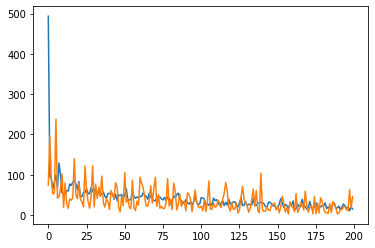

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

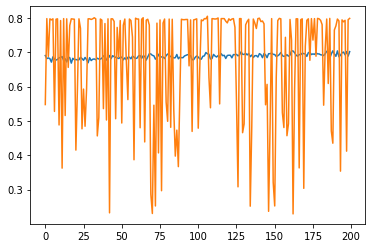

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6625